<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#New-features" data-toc-modified-id="New-features-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>New features</a></span></li><li><span><a href="#Setup" data-toc-modified-id="Setup-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Setup</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data</a></span></li><li><span><a href="#Representation" data-toc-modified-id="Representation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Representation</a></span></li><li><span><a href="#Support-for-Indices-(including-Date-dtype)" data-toc-modified-id="Support-for-Indices-(including-Date-dtype)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Support for Indices (including <code>Date</code> dtype)</a></span></li><li><span><a href="#Customization" data-toc-modified-id="Customization-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Customization</a></span></li><li><span><a href="#Custom-Graph-Objects" data-toc-modified-id="Custom-Graph-Objects-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Custom Graph Objects</a></span></li></ul></div>

# Jupyter DataTables 0.3.0 - ChartJS

<br>

## New features

- **ChartJS** charts (see https://github.com/CermakM/jupyter-datatables/issues/9)
    - [x] Create `Bar` graph object
    - [x] Create `CategoricalBar` graph object
    - [x] [optional] Create `Line` graph object
    - [x] [optional] Create `Scatter` graph object
    - [x] Create `Histogram` graph object
    - [x] <del>Create `TimeSeries` graph object</del> Implemented via `Linear` with timeseries index
    - [x] ChartJS graphs are persistent
    - [x] [stretch] There is a link between the table and ChartJS tooltip
    
- **modular** architecture (see https://github.com/CermakM/jupyter-datatables/issues/10)
    - [x] it is possible to add custom data type mapping form Jupyter Notebook
    - [x] it is possible to map data types to custom plotting function directly from Jupyter Notebook
    - [x] custom graph objects
    
- intercative **tooltips**
- static mode is more explanatory
- sample size includes outliers

## Setup

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import string

import numpy as np
import pandas as pd

In [3]:
sys.path.insert(0, '../')

In [4]:
from jupyter_datatables import init_datatables_mode

<JupyterRequire.display.SafeScript object>

In [5]:
init_datatables_mode()

<JupyterRequire.display.SafeScript object>

<JupyterRequire.display.SafeScript object>

<JupyterRequire.display.SafeScript object>

<JupyterRequire.display.SafeScript object>

---

## Data

In [6]:
df      = pd.DataFrame(np.random.randn(50, 5), columns=list(string.ascii_uppercase[:5]))
df_long = pd.DataFrame(np.random.randn(int(1e5), 5), columns=list(string.ascii_uppercase[:5]))
df_wide = pd.DataFrame(np.random.randn(50, 20), columns=list(string.ascii_uppercase[:20]))

labels = ["{0} - {1}".format(i, i + 9) for i in range(0, 100, 10)]
df_categorical = pd.DataFrame({'value': np.random.randint(0, 100, 20)})
df_categorical['group'] = pd.cut(df_categorical.value, range(0, 105, 10), right=False, labels=labels)

In [7]:
dft = pd.DataFrame({'A': np.random.rand(5),
                    'B': [1, 1, 3, 2, 1],
                    'C': 'This is a very long sentence that should automatically be trimmed',
                    'D': [pd.Timestamp('20010101'), pd.Timestamp('20010102'), pd.Timestamp('20010103'), pd.Timestamp('20010104'), pd.Timestamp('20010105')],
                    'E': pd.Series([1.0] * 5).astype('float32'),
                    'F': [False, True, False, False, True],
                   })

dft.D = dft.D.apply(pd.to_datetime)
dft.set_index('D', inplace=True)

del dft.index.name

---

## Representation

,A,B,C,D,E
,float64,float64,float64,float64,float64
,,,,,
,float64,float64,float64,float64,float64
,,,,,
0,0.281838,-0.219648,-0.203174,-0.917984,2.033045
1,0.651726,1.296750,0.452951,-0.018035,-0.278206
2,0.524522,-1.584713,0.776253,-0.055463,1.246171
3,-0.001261,0.551801,1.248790,-1.445737,-0.631210
4,-0.281629,0.312822,-0.545312,-0.388821,-1.102713
5,0.821702,0.161718,0.386439,0.635947,1.057523

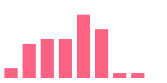
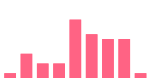
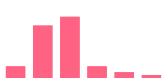
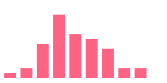
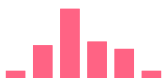
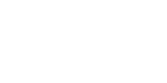
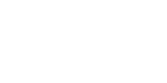
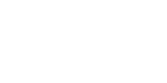
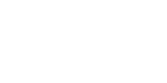
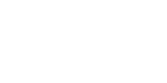

<JupyterRequire.display.SafeScript object>

,A,B,C,D,E
0,0.281838,-0.219648,-0.203174,-0.917984,2.033045
1,0.651726,1.296750,0.452951,-0.018035,-0.278206
2,0.524522,-1.584713,0.776253,-0.055463,1.246171
3,-0.001261,0.551801,1.248790,-1.445737,-0.631210
4,-0.281629,0.312822,-0.545312,-0.388821,-1.102713
5,0.821702,0.161718,0.386439,0.635947,1.057523
6,0.089108,0.259841,0.186211,0.577161,-0.966055
7,1.627537,1.408761,-0.258071,0.906556,-0.579567
8,-0.940454,-0.335826,0.858865,-0.150099,-0.041245
9,-1.194165,-2.173277,0.456940,-0.478629,-0.123499


In [8]:
df

,A,B,C,D,E
,float64,float64,float64,float64,float64
,,,,,
,float64,float64,float64,float64,float64
,,,,,
0,-0.041363,-0.539759,0.067654,-0.019638,-0.279040
1,-1.719839,-1.241162,-1.273824,-0.177492,1.516613
2,-3.203080,-0.199548,0.990652,-0.574569,-1.111172
3,-1.865637,0.562344,-0.417856,0.857594,1.377277
4,-1.686820,-1.213942,-1.575958,0.027575,-1.728955
5,1.352070,1.762786,0.148850,-0.242119,0.406494

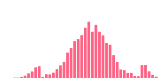
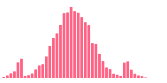
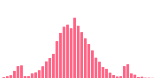
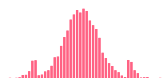
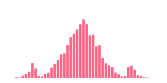
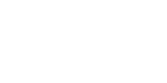
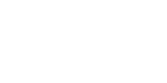
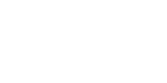
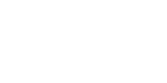
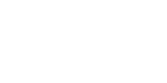

<JupyterRequire.display.SafeScript object>

,A,B,C,D,E
0,-0.041363,-0.539759,0.067654,-0.019638,-0.279040
1,-1.719839,-1.241162,-1.273824,-0.177492,1.516613
2,-3.203080,-0.199548,0.990652,-0.574569,-1.111172
3,-1.865637,0.562344,-0.417856,0.857594,1.377277
4,-1.686820,-1.213942,-1.575958,0.027575,-1.728955
5,1.352070,1.762786,0.148850,-0.242119,0.406494
6,-0.867047,0.535314,-0.229524,-0.620091,-0.846191
7,-0.469302,0.529296,-0.583402,-0.540515,-1.110452
8,-0.207167,1.775233,0.807693,-0.151471,-0.298329
9,0.416216,0.663263,0.024434,1.586737,-1.244124


In [9]:
df_long

Notice the automatic sampling, we sampled to 5,902 samples out of 100,000 while still preserving value of the data!

If you wish, however, to disable that feature, you may do so:

In [10]:
from jupyter_datatables.config import defaults

defaults.sample_size = 1000

,A,B,C,D,E
,float64,float64,float64,float64,float64
,,,,,
,float64,float64,float64,float64,float64
,,,,,
0,-0.041363,-0.539759,0.067654,-0.019638,-0.279040
1,-1.719839,-1.241162,-1.273824,-0.177492,1.516613
2,-3.203080,-0.199548,0.990652,-0.574569,-1.111172
3,-1.865637,0.562344,-0.417856,0.857594,1.377277
4,-1.686820,-1.213942,-1.575958,0.027575,-1.728955
5,1.352070,1.762786,0.148850,-0.242119,0.406494

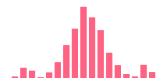
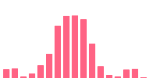
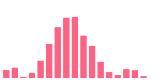
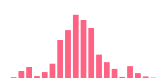
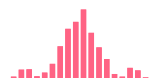
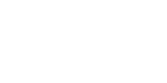
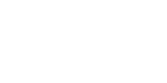
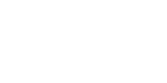
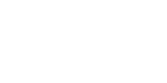
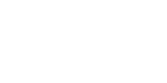

<JupyterRequire.display.SafeScript object>

,A,B,C,D,E
0,-0.041363,-0.539759,0.067654,-0.019638,-0.279040
1,-1.719839,-1.241162,-1.273824,-0.177492,1.516613
2,-3.203080,-0.199548,0.990652,-0.574569,-1.111172
3,-1.865637,0.562344,-0.417856,0.857594,1.377277
4,-1.686820,-1.213942,-1.575958,0.027575,-1.728955
5,1.352070,1.762786,0.148850,-0.242119,0.406494
6,-0.867047,0.535314,-0.229524,-0.620091,-0.846191
7,-0.469302,0.529296,-0.583402,-0.540515,-1.110452
8,-0.207167,1.775233,0.807693,-0.151471,-0.298329
9,0.416216,0.663263,0.024434,1.586737,-1.244124


In [11]:
df_long

And to allow sampling again simply set `sample_size` to `None`:

In [12]:
defaults.sample_size = None

Sampling can also be disabled completely (although it is not recommended). The `defaults.limit` specifies the limit after which, when exceeded, is a sample size computed.

In [13]:
defaults.limit = None

Let's take a sampe from the table of size 10,000, otherwise the computation would take a while and will consume quite a lot of resources

,A,B,C,D,E
,float64,float64,float64,float64,float64
,,,,,
,float64,float64,float64,float64,float64
,,,,,
62500,-0.126142,0.095316,0.321524,-0.616824,-0.363271
33318,0.264134,2.419718,-0.516286,0.121354,-4.005275
21811,-0.023820,-0.751078,0.259660,0.756730,-0.732722
39602,0.111471,0.217272,-0.280419,-0.385585,-0.177838
38247,0.207304,-1.095124,0.844130,0.868020,-1.072838
87045,1.371036,0.082072,-1.939868,0.258486,-0.190287

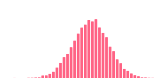
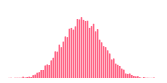
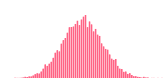
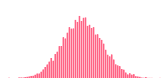
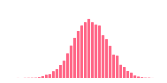
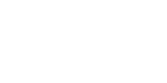
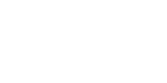
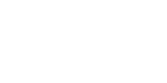
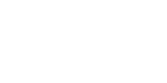
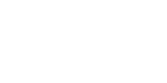

<JupyterRequire.display.SafeScript object>

,A,B,C,D,E
62500,-0.126142,0.095316,0.321524,-0.616824,-0.363271
33318,0.264134,2.419718,-0.516286,0.121354,-4.005275
21811,-0.023820,-0.751078,0.259660,0.756730,-0.732722
39602,0.111471,0.217272,-0.280419,-0.385585,-0.177838
38247,0.207304,-1.095124,0.844130,0.868020,-1.072838
87045,1.371036,0.082072,-1.939868,0.258486,-0.190287
66412,1.896125,1.786979,-0.472142,-1.128792,-0.496984
89256,-0.875811,-0.316140,-0.301438,2.183297,-1.180630
43181,0.456203,0.086808,-0.251278,0.045244,-1.762321
16785,-0.890806,-0.957364,0.186850,-0.435854,0.261383


In [14]:
df_long.sample(10000)

Wide DataTables work as expected:

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T
,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
,,,,,,,,,,,,,,,,,,,,
,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
,,,,,,,,,,,,,,,,,,,,
0,-2.255936,0.175437,-0.247806,0.475884,0.448549,0.070762,-0.829636,-1.164231,-1.098005,-0.655648,-0.188336,0.958840,0.590286,-0.249893,-1.201717,-1.538562,-0.332154,0.142709,-0.135852,-0.030777
1,-0.404482,1.780116,-0.392071,1.038906,-0.827951,0.890728,-0.232014,1.251334,-1.979700,-0.017387,0.519235,0.259415,-0.615061,0.539013,1.412732,-0.141290,-1.867601,0.423942,-1.094830,0.792953
2,1.606099,1.079662,1.012810,0.565174,-1.684541,-2.425984,0.522845,0.267193,-1.333124,2.028935,1.612153,-1.694732,-0.717704,-1.137760,-2.167271,1.705922,-0.500570,0.090950,0.428850,-0.056736
3,-0.808996,0.027061,0.327790,1.481479,-0.560803,1.266785,-0.308801,2.155692,-0.988815,-0.711162,-1.358436,0.018375,0.318450,-0.506989,0.293507,0.407598,-0.163820,-0.574077,-0.073113,0.835812
4,-1.880061,2.092566,1.721620,-0.129939,-0.201160,-0.454487,0.142272,-0.544381,-0.851035,-0.048110,-1.130661,-0.110434,-0.339238,0.783535,0.003907,-0.030949,-0.509822,-0.202853,-0.294332,-1.003904
5,1.435656,0.712119,-0.974666,-1.972417,2.173629,1.660263,-0.416062,-0.439926,-1.091085,-0.137628,-1.694015,0.314965,-1.463775,-1.577155,-0.043721,0.273894,1.271601,-0.774442,-0.169424,0.984523

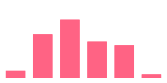
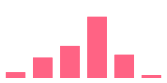
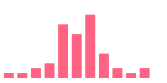
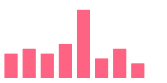
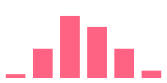
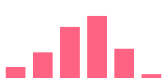
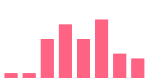
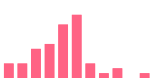
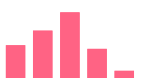
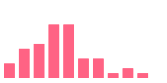
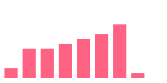
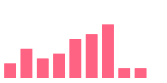
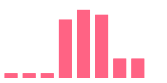
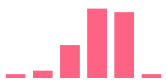
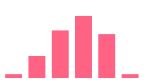
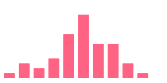
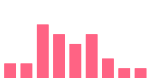
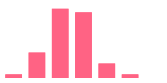
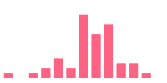
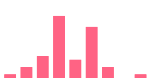
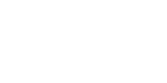
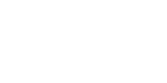
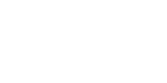
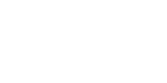
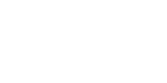
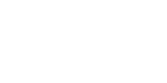
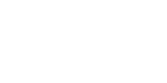
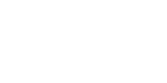
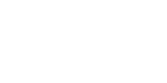
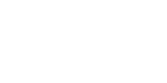
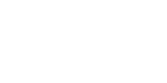
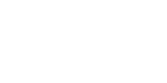
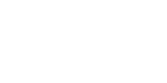
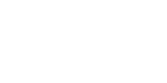
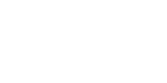
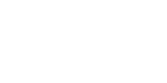
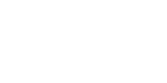
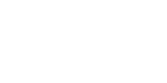
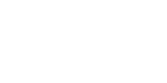
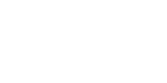

<JupyterRequire.display.SafeScript object>

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T
0,-2.255936,0.175437,-0.247806,0.475884,0.448549,0.070762,-0.829636,-1.164231,-1.098005,-0.655648,-0.188336,0.958840,0.590286,-0.249893,-1.201717,-1.538562,-0.332154,0.142709,-0.135852,-0.030777
1,-0.404482,1.780116,-0.392071,1.038906,-0.827951,0.890728,-0.232014,1.251334,-1.979700,-0.017387,0.519235,0.259415,-0.615061,0.539013,1.412732,-0.141290,-1.867601,0.423942,-1.094830,0.792953
2,1.606099,1.079662,1.012810,0.565174,-1.684541,-2.425984,0.522845,0.267193,-1.333124,2.028935,1.612153,-1.694732,-0.717704,-1.137760,-2.167271,1.705922,-0.500570,0.090950,0.428850,-0.056736
3,-0.808996,0.027061,0.327790,1.481479,-0.560803,1.266785,-0.308801,2.155692,-0.988815,-0.711162,-1.358436,0.018375,0.318450,-0.506989,0.293507,0.407598,-0.163820,-0.574077,-0.073113,0.835812
4,-1.880061,2.092566,1.721620,-0.129939,-0.201160,-0.454487,0.142272,-0.544381,-0.851035,-0.048110,-1.130661,-0.110434,-0.339238,0.783535,0.003907,-0.030949,-0.509822,-0.202853,-0.294332,-1.003904
5,1.435656,0.712119,-0.974666,-1.972417,2.173629,1.660263,-0.416062,-0.439926,-1.091085,-0.137628,-1.694015,0.314965,-1.463775,-1.577155,-0.043721,0.273894,1.271601,-0.774442,-0.169424,0.984523
6,0.371500,0.257088,-0.737483,0.326488,-1.198378,0.321565,0.616178,0.703670,0.655920,-1.608465,1.284540,0.791296,-0.454546,0.482737,0.000577,0.547927,0.601178,0.015129,1.669799,1.241653
7,1.673956,0.889808,0.274278,0.488843,-0.283713,0.275746,1.600645,-0.903988,-0.557700,-0.001410,-0.706070,-0.054974,-0.403142,-0.571205,1.350148,0.959850,-0.581742,0.282773,-0.229787,0.665185
8,-0.471482,1.378711,-2.124238,1.719428,0.282507,-0.584915,0.785401,-0.111617,0.902587,-1.265295,0.424577,-0.226224,0.106318,-0.058089,-0.358802,0.327708,0.765326,1.905204,1.828849,-0.437710
9,-0.223886,-1.435061,0.011238,0.148829,0.201529,0.658214,-0.194667,0.575498,1.167207,-0.625245,-0.725773,-1.597950,-0.564383,-1.722475,1.007463,1.164375,0.527888,0.667654,1.854273,-0.060680


In [15]:
df_wide

## Support for Indices (including `Date` dtype)

Lets change the default plot for `num` from `Histogram` to `Line` and check our timeseries-like DataFrame

In [16]:
%%requirejs

$.fn.dataTable.defaults.dTypePlotMap['num'].unshift('Line')

,A,B,C,E,F
,float64,int64,object,float32,bool
,,,,,
,float64,int64,object,float32,bool
,,,,,
2001-01-01,0.299967,1,This is a very long sentence that should autom...,1.0,False
2001-01-02,0.355820,1,This is a very long sentence that should autom...,1.0,True
2001-01-03,0.652331,3,This is a very long sentence that should autom...,1.0,False
2001-01-04,0.509980,2,This is a very long sentence that should autom...,1.0,False
2001-01-05,0.297192,1,This is a very long sentence that should autom...,1.0,True

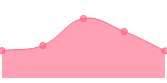
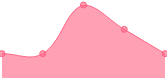
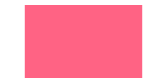
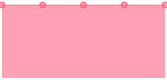
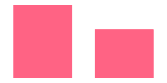
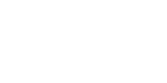
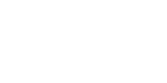
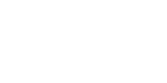
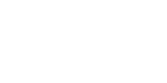
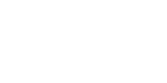

<JupyterRequire.display.SafeScript object>

,A,B,C,E,F
2001-01-01,0.299967,1,This is a very long sentence that should autom...,1.0,False
2001-01-02,0.355820,1,This is a very long sentence that should autom...,1.0,True
2001-01-03,0.652331,3,This is a very long sentence that should autom...,1.0,False
2001-01-04,0.509980,2,This is a very long sentence that should autom...,1.0,False
2001-01-05,0.297192,1,This is a very long sentence that should autom...,1.0,True


In [17]:
dft

---

## Customization

In [18]:
%load_ext jupyter_require

<JupyterRequire.display.SafeScript object>

In [19]:
%%requirejs

let defaultElementConfig = $("<pre/>").html(JSON.stringify(Chart.defaults.global.elements, null, 4))

element.append(defaultElementConfig)

Check out [ChartJS](https://www.chartjs.org/docs/latest/general/) docs for more information about default settings

---

## Custom Graph Objects

You can create your custom GraphObjects by implementing a function of the following specification:

```ts
interface Index {
    data: Array<any>,
    dtype: string
}

function(data: Array<any>, index: Array<Index>, dtype: string): Chart
```

Suppose we wanna plot colours and we want a special kind of plot for that

In [20]:
%%requirejs chartjs

let isValidColour = function(colour) {
    let s = new Option().style
    s.color = colour
    
    return s.color !== '' || console.debug(`Invalid CSS colour: '${colour}'.`)
}

let ColorPalette = function(data, index, dtype) {
    const canvas = document.createElement('canvas')
    const ctx    = canvas.getContext('2d')
    
    // perform check if the pattern is correct
    if ( !data.every( d => typeof(d) === 'string' && isValidColour(d) ) ) {
        console.debug("Data does not match colour pattern.")
        return
    }
    
    // evenly slice the Pie chart by number of colours
    const slices = new Array(data.length).fill(Number(1 / data.length).toFixed(2))
    const labels = index[0].data
    
    let chart = new Chart(ctx, {
        type: 'pie',
        data: {
            labels: labels,
            datasets: [{
                data: slices,
                backgroundColor: data,
            }]
        },
    })
    
    return chart
}

// Register the new chart
$.fn.dataTable.defaults.graphObjects['ColorPalette'] = ColorPalette

And set it as default for the dtype you wanna use it for (in this case `string`):

    The default setting is:
   
```
   { 
       boolean:  ['CategoricalBar', 'Histogram'],
       date:     ['CategoricalBar', 'Histogram'],
       num:      ['Histogram', 'CategoricalBar', 'Bar', 'Line'],
       string:   ['CategoricalBar', 'Histogram'],

       undefined: ['Bar']
   }
    
```

    The order specifies fallback plots.

In [21]:
%%requirejs

$.fn.dataTable.defaults.dTypePlotMap['string'].unshift('ColorPalette')

,value
,object
,
,object
,
red,"rgb(255, 99, 132)"
blue,"rgb(54, 162, 235)"
lightyellow,"rgba(255, 205, 86, 0.3)"
darkorange,darkorange

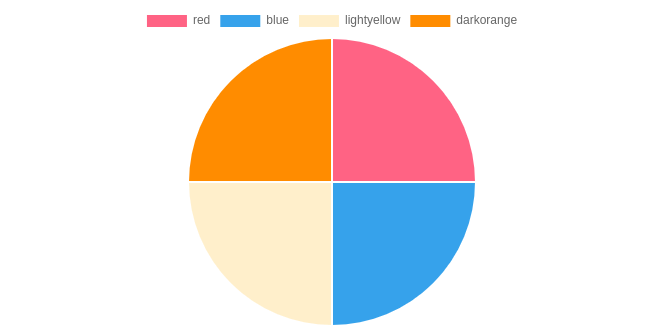

<JupyterRequire.display.SafeScript object>

,value
red,"rgb(255, 99, 132)"
blue,"rgb(54, 162, 235)"
lightyellow,"rgba(255, 205, 86, 0.3)"
darkorange,darkorange


In [22]:
df_colours = pd.DataFrame([
    {
        "colour": "red",
        "value" : "rgb(255, 99, 132)",
    },
    {
        "colour": "blue",
        "value" : "rgb(54, 162, 235)"
    },
    {
        "colour": "lightyellow",
        "value" : "rgba(255, 205, 86, 0.3)"  # alpha values via `rgba()`
    },
    {
        "colour": "darkorange",
        "value" : "darkorange"  # any valid CSS specifier
    }
])

df_colours.set_index("colour", inplace=True)

# As of v0.3.0, DataTables do not support index names properly
del df_colours.index.name

df_colours

We fall back to the default chart if the colour value is invalid based on our check and use the second chart in order:

,value
,object
,
,object
,
red,red
green,invalid
blue,blue
other,invalid

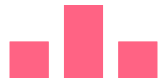
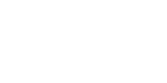

<JupyterRequire.display.SafeScript object>

,value
red,red
green,invalid
blue,blue
other,invalid


In [23]:
df_other = pd.DataFrame([
    {
        "colour": "red",
        "value" : "red",
    },
    {
        "colour": "green",
        "value" : "invalid",
    },
    {
        "colour": "blue",
        "value" : "blue",
    },
    {
        "colour": "other",
        "value" : "invalid",
    }
])

df_other.set_index("colour", inplace=True)

del df_other.index.name

df_other